# Chapter 07 문서 업무 자동화

## 7.1 엑셀 업무 자동화

### openpyxl 개요

In [ ]:
!pip install openpyxl                         # openpyxl 패키지 설치

#### openpyxl의 주요 기능
- 엑셀 파일(워크북) 생성, 수정, 삭제 및 기존 엑셀 파일 불러오기
- 워크시트 생성 및 수정, 행/열(셀) 생성 및 수정
- 셀에 들어있는 값과 표시 형식 추가, 수정 및 셀 메모 생성
- 텍스트 서식, 셀 테두리/배경, 셀 크기 등 서식 수정
- 그래프(차트), 피벗 테이블 생성 및 수정

### 엑셀 파일과 시트 다루기

In [1]:
# 엑셀 파일 생성 및 저장하기 
from openpyxl import Workbook                # Workbook 모듈(클래스) 불러오기
wb = Workbook()                               # wb 객체 생성
ws = wb.active                                # ws 객체 생성
ws.title = "시트1"                            # ws 시트의 시트명 변경
ws.append(["이름", "나이", "성별"])           # ws 시트의 첫 번째 행부터 차례로 내용 추가
ws.append(["이순신", "55", "남자"])           # 두 번째 행에 추가
wb.save(filename = "테스트.xlsx")             # workbook 저장

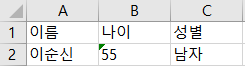

In [2]:
# 엑셀 파일을 불러와 내용 수정 후 저장하기
from openpyxl import load_workbook           # Workbook 모듈과 load_workbook 불러오기
wb = load_workbook(filename = "테스트.xlsx")  # "테스트.xlsx" 파일을 불러오기
ws = wb.active                                # ws 활성화
ws.append(["홍길동", "40", "남자"])           # 행 추가
wb.save(filename = "테스트.xlsx")             # wb를 "테스트.xlsx" 파일로 저장

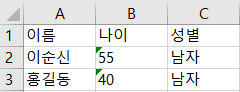

In [3]:
from openpyxl import Workbook                # Workbook 모듈(클래스) 불러오기
wb = Workbook()                               # wb 객체 생성, wb에 시트 하나가 기본 추가됨
wb.create_sheet("시트2")                      # wb에 "시트2" 시트 추가
wb.create_sheet("시트3")                      # wb에 "시트3" 시트 추가

<Worksheet "시트3">

In [4]:
print(wb.sheetnames)                          # wb 객체에 있는 시트 정보 출력

['Sheet', '시트2', '시트3']


In [5]:
ws = wb["시트2"]                              # wb 객체에 있는 “시트2”를 선택
ws.append(["첫 번째로 추가된 시트입니다."])   # 선택된 시트에 내용 추가

In [6]:
wb["시트3"].append(["세 번째 시트에 내용을 추가합니다."])   # 시트를 직접 지정해서 내용 추가
wb.save(filename = "샘플_시트 추가.xlsx")                   # 파일 저장
wb["시트3"]["A1"].value                                     # 셀의 내용 확인하기

'세 번째 시트에 내용을 추가합니다.'

In [7]:
# 시트 복사하기
from openpyxl import load_workbook           # Workbook 모듈과 load_workbook 불러오기
wb = load_workbook("테스트.xlsx")             # "테스트.xlsx" 파일을 불러와 wb 객체에 저장
wb.copy_worksheet(wb["시트1"])                # "시트1"을 복사하여 wb 객체에 저장
wb.active = wb["시트1 Copy"]                  # 파일을 열 때 “시트1 Copy”를 활성화 
wb.save(filename = "샘플_시트 복사.xlsx")     # 파일 저장

In [8]:
# 시트 이름 바꾸기
from openpyxl import load_workbook           # Workbook 모듈과 load_workbook 불러오기
wb = load_workbook("샘플_시트 복사.xlsx")     # "샘플_시트 복사.xlsx" 파일 불러오기
print(wb.sheetnames)                          # 시트명 출력

wb["시트1 Copy"].title = "시트1 복사"         # "시트1 Copy" 시트명을 "시트1 복사"로 변경
wb.save(filename = "샘플_시트 복사.xlsx")     # 파일 저장
print(wb.sheetnames)                          # 시트명 출력

['시트1', '시트1 Copy']
['시트1', '시트1 복사']


In [9]:
# 시트 순서 변경하기  
from openpyxl import load_workbook            # Workbook 모듈과 load_workbook 불러오기
wb = load_workbook("샘플_시트 복사.xlsx")      # "샘플_시트 복사.xlsx" 파일 불러오기
print(wb.sheetnames)                           # 시트명 출력

wb.move_sheet(wb["시트1 복사"], -1)            # “시트1 복사” 시트를 왼쪽으로 이동 
wb.save(filename = "샘플_시트 순서 변경.xlsx") # 파일 저장
print(wb.sheetnames)                           # 시트명 출력

['시트1', '시트1 복사']
['시트1 복사', '시트1']


In [10]:
# 시트 삭제하기
from openpyxl import load_workbook            # Workbook 모듈과 load_workbook 불러오기
wb = load_workbook("샘플_시트 순서 변경.xlsx") # "샘플_시트 순서 변경.xlsx" 파일 불러오기
print(wb.sheetnames)                           # 시트명 출력

wb.remove(wb["시트1 복사"])                    # "시트1 복사" 시트 삭제하기
wb.save(filename = "샘플_시트 삭제.xlsx")      # 파일 저장
print(wb.sheetnames)

['시트1 복사', '시트1']
['시트1']


### 셀 내용 다루기

In [11]:
# 셀의 내용 확인하기
from openpyxl import load_workbook     # Workbook 모듈과 load_workbook 불러오기
wb = load_workbook("테스트.xlsx")       # "테스트.xlsx" 파일을 불러와 wb 객체에 저장
ws = wb["시트1"]                        # 시트 선택
print(ws["A1"].value)                   # [A1] 셀의 값을 출력
print(ws[1][0].value)                   # 1행 0열의 값 출력

이름
이름


In [12]:
# 반복문을 통해 셀 정보에 접근하기
from openpyxl import load_workbook      # Workbook 모듈과 load_workbook 불러오기
wb = load_workbook("테스트.xlsx")        # "테스트.xlsx" 파일을 불러와 wb 객체에 저장
ws = wb["시트1"]                         # 시트 선택

for row in ws:            # 반복문을 활용하여 ws 객체에 데이터가 있는 행을 차례로 불러옴 
    print(row)            # 행의 속성을 출력

(<Cell '시트1'.A1>, <Cell '시트1'.B1>, <Cell '시트1'.C1>)
(<Cell '시트1'.A2>, <Cell '시트1'.B2>, <Cell '시트1'.C2>)
(<Cell '시트1'.A3>, <Cell '시트1'.B3>, <Cell '시트1'.C3>)


In [13]:
for row in ws:           # 반복문을 활용하여 ws 객체에 데이터가 있는 행을 차례로 읽어 옴 
    for cell in row:     # 반복문을 활용하여 변수 row에 있는 속성과 값을 읽어 cell에 저장
        print("셀 객체명 : {}, 셀 값 : {}".format(cell, cell.value))  # cell의 속성과 값을 출력

셀 객체명 : <Cell '시트1'.A1>, 셀 값 : 이름
셀 객체명 : <Cell '시트1'.B1>, 셀 값 : 나이
셀 객체명 : <Cell '시트1'.C1>, 셀 값 : 성별
셀 객체명 : <Cell '시트1'.A2>, 셀 값 : 이순신
셀 객체명 : <Cell '시트1'.B2>, 셀 값 : 55
셀 객체명 : <Cell '시트1'.C2>, 셀 값 : 남자
셀 객체명 : <Cell '시트1'.A3>, 셀 값 : 홍길동
셀 객체명 : <Cell '시트1'.B3>, 셀 값 : 40
셀 객체명 : <Cell '시트1'.C3>, 셀 값 : 남자


In [15]:
# 셀 내용 수정하기
from openpyxl import load_workbook        # Workbook 모듈과 load_workbook 불러오기
wb = load_workbook("테스트.xlsx")          # "테스트.xlsx" 파일을 불러와 wb 객체에 저장
ws = wb["시트1"]                           # 시트 선택

ws["A1"] = "성명"                          # [A1] 셀의 내용을 "이름"에서 "성명"으로 변경 
wb.save(filename = "테스트_셀 내용 변경.xlsx")

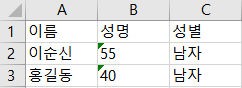

In [17]:
# 반복문을 통해 셀 정보에 순차적으로 접근, 값 변경하기
from openpyxl import load_workbook        # Workbook 모듈과 load_workbook 불러오기
wb = load_workbook("테스트.xlsx")          # "테스트.xlsx" 파일을 불러와 wb 객체에 저장
ws = wb["시트1"]                           # 시트 선택
new_data = ["신사임당", "45", "여자"]      # 변경할 데이터를 리스트로 생성

row_no = 1                                        # 행 번호를 저장할 변수 설정
for row in ws:                                    # ws의 행을 하나씩 읽어 옴
    if row_no == 2:                               # row_no가 2일 때(2행) 아래 코드 실행
        for cell in row:                          # 행의 각 셀에 접근
            cell.value = new_data[cell.col_idx-1] # 셀 값 변경 (col_idx:셀의 열을 숫자로 표시)
    row_no += 1                                   # row_no 증가
wb.save(filename = "테스트_셀 내용 변경(반복문).xlsx")

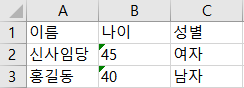

In [18]:
# 셀에 내용 입력하기
from openpyxl import load_workbook             # Workbook 모듈과 load_workbook 불러오기
wb = load_workbook("테스트.xlsx")               # "테스트.xlsx" 파일을 불러와 wb 객체에 저장
ws = wb["시트1"]                                # 시트 선택

ws["A4"] = "신사임당"                           # 셀에 직접 데이터 입력
ws["B4"] = "45"
ws["C4"] = "여자"

ws.append(["을지문덕", "60", "남자"])           # 다음 행에 데이터 입력

new_data_list = [["유관순", "16", "여자"], ["세종대왕", "60", "남자"]]   # 리스트 생성

for new_data in new_data_list:                  # 반복문을 활용해 데이터 입력
    ws.append(new_data)

wb.save(filename = "테스트_셀 내용 입력.xlsx")  # 파일 저장

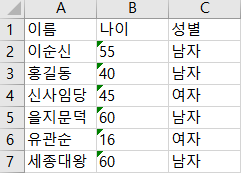

In [20]:
# 행/열 삭제하기
from openpyxl import load_workbook             # Workbook 모듈과 load_workbook 불러오기
wb = load_workbook("테스트.xlsx")               # "테스트.xlsx" 파일을 불러와 wb 객체에 저장
ws = wb["시트1"]                                # 시트 선택

# 테스트.xlsx 출력 확인
for row in ws:          
    for cell in row:    
        print(cell.value, end=' ') 
    print()

ws.delete_rows(idx = 2, amount = 1)             # 2행부터 1행만 삭제 
ws.delete_cols(idx = 2, amount = 2)             # 두 번째 열(B열)부터 2열 삭제 

wb.save(filename = "테스트_행과 열 삭제.xlsx")  # 파일 저장

이름 나이 성별 
이순신 55 남자 
홍길동 40 남자 


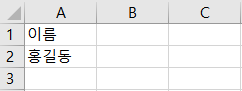

In [21]:
# 셀 복사하기
from openpyxl import load_workbook        # Workbook 모듈과 load_workbook 불러오기
wb = load_workbook("테스트.xlsx")          # "테스트.xlsx" 파일을 불러와 wb 객체에 저장
ws = wb["시트1"]                           # 시트 선택

src = ws["A2"].value                       # [A2] 셀 값을 변수 src에 저장 (src:이순신)
ws["A5"] = src                             # [A5] 셀에 [A2] 셀 값을 복사

for row in ws["A6:C6"]:                   # [A6:C6] 범위를 선택해 반복문 실행
    for cell in row:                      # 행의 각 셀에 접근
        cell.value = src                   # 행의 각 셀을 src 변수 값으로 변경

wb.save(filename = "테스트_셀 복사1.xlsx") # 파일 저장

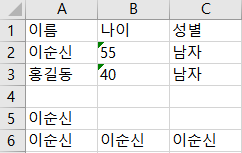

In [22]:
from openpyxl import load_workbook    # Workbook 모듈과 load_workbook 불러오기
wb = load_workbook("테스트.xlsx")      # "테스트.xlsx" 파일을 불러와 wb 객체에 저장
ws = wb["시트1"]                       # 시트 선택

src_data = []                 # 복사할 값을 저장할 변수 선언
for cell in ws[2]:             # 원본이 될 2행에 접근
    src_data.append(cell.value)  # 2행의 셀 값들을 src_data 변수에 저장

for row in ws["A5:C5"]:                    # [A2:C3] 범위를 선택해 반복문 실행
    for cell in row:                         # 행의 각 셀에 접근
        cell.value = src_data[cell.col_idx-1]  # 셀의 값을 src 변수 값으로 변경    
    
wb.save(filename = "테스트_셀 복사2.xlsx")     # 파일 저장

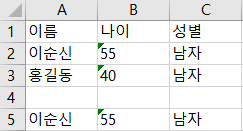

In [24]:
# 셀 내용 이동하기
from openpyxl import load_workbook    # Workbook 모듈과 load_workbook 불러오기
wb = load_workbook("테스트.xlsx")      # "테스트.xlsx" 파일을 불러와 wb 객체에 저장
ws = wb["시트1"]                       # 시트 선택

# [B1:C3] 영역에 있는 데이터를 아래로 한 칸, 오른쪽으로 2칸 이동
ws.move_range("B1:C3", rows = 1, cols = 2)     # 음수값을 사용해 위나 왼쪽으로도 이동 가능
wb.save(filename = "테스트_셀 이동.xlsx")      # 파일 저장

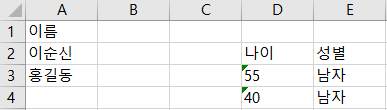

In [25]:
# 셀 병합 및 해제하기
from openpyxl import load_workbook    # Workbook 모듈과 load_workbook 불러오기
wb = load_workbook("테스트.xlsx")      # "테스트.xlsx" 파일을 불러와 wb 객체에 저장
ws = wb["시트1"]                       # 시트 선택

ws.merge_cells("A1:B1")                # [A1], [B1] 셀 병합
ws.merge_cells("A2:B2")                # [A2], [B2] 셀 병합

ws.unmerge_cells("A2:B2")              # [A2], [B2] 셀 병합 해제

wb.save(filename = "테스트_셀 병합.xlsx")  # 파일 저장
# [A1:B1] 셀은 병합되어 [A1] 셀 값만 보이게 되고, [A2:B2] 셀은 병합 후 다시 병합 해제하여 [A2] 셀 값만 보이게 됩니다. 

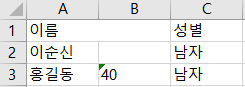

In [26]:
# 텍스트 형식을 숫자 형식으로 바꾸고 엑셀 함수로 연산하기
from openpyxl import load_workbook    # Workbook 모듈과 load_workbook 불러오기
wb = load_workbook("테스트.xlsx")      # "테스트.xlsx" 파일을 불러와 wb 객체에 저장
ws = wb["시트1"]                       # 시트 선택

ws["B2"].data_type = "i"               # B2 셀을 정수형으로 변환
ws["B3"].data_type = "i"               # B3 셀을 정수형으로 변환 
ws["A4"] = "나이 합계"                 # A4 셀에 데이터 입력
ws["B4"] = "=sum(B2:B3)"               # B4 셀에 sum 함수 입력
wb.save(filename = "테스트_셀 연산.xlsx")

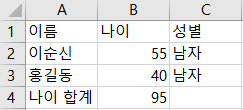

### 셀 서식 다루기

In [27]:
# 셀 배경과 폰트 서식 변경하기
from openpyxl import load_workbook              # Workbook 모듈과 load_workbook 불러오기
from openpyxl.styles import Font, PatternFill   # 폰트와 배경 설정 클래스 불러오기

wb = load_workbook("테스트.xlsx")                # "테스트.xlsx" 파일을 불러와 wb 객체에 저장
ws = wb["시트1"]                                 # 시트 선택

# 항목 부분 [A1:C1]의 배경을 검은색, 폰트 크기 12, 볼드체, 글자색 흰색으로 변경
# 색 정보는 aRGB HEX 코드로 지정하면 됨
fill_style = PatternFill(fill_type = "solid", start_color = "000000")    # 셀 배경 설정
font_style = Font(color = "FFFFFF", sz = 12, bold = True)               #폰트 설정

for row in ws:                      # ws의 행을 하나씩 읽어 옴
    for cell in row:                # 행의 각 셀에 접근
        if cell.row == 1:           # 셀 행이 1일 때 True가 되어 속성 변경 가능
            cell.fill = fill_style    # 셀의 배경 속성을 fill_style로 설정  
            cell.font = font_style    # 셀의 폰트 속성을 font_style로 설정
wb.save(filename = "테스트_배경 서식 변경.xlsx")

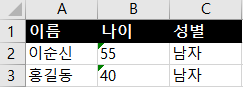

In [30]:
# 셀 높이와 너비 조정하기
from openpyxl import load_workbook              # 모듈 불러오기
wb = load_workbook("테스트_배경 서식 변경.xlsx") # 파일 불러와 wb 객체에 저장
ws = wb["시트1"]                                 # 시트 선택

# 1~5행의 높이를 24, A열의 너비를 14로 변경
for i in range(1, 6):
    ws.row_dimensions[i].height = 24    # row_dimensions[숫자] → i행 전체를 선택
ws.column_dimensions["A"].width = 14    # column_dimensions["A"] → A열 전체를 선택
wb.save(filename = "테스트_너비와 높이 조정.xlsx")

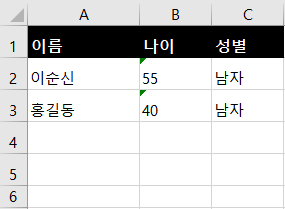

In [31]:
# 텍스트 정렬하기
from openpyxl import load_workbook                 # 모듈 불러오기
from openpyxl.styles import Alignment              # 텍스트 정렬 모듈 불러오기

wb = load_workbook("테스트_너비와 높이 조정.xlsx")  # 파일 불러와서 wb 객체에 저장
ws = wb["시트1"]                                    # 시트 선택

# 가로와 세로 정렬값을 중앙으로 변경하는 객체 생성
alignment_style = Alignment(horizontal = "center", vertical = "center")

for row in ws:                                # ws의 행을 하나씩 읽어 옴
    for cell in row:                          # 행의 각 셀에 접근
        cell.alignment = alignment_style       # 셀의 정렬 속성을 설정

wb.save(filename = "테스트_텍스트 정렬.xlsx")  # 파일 저장

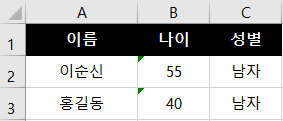

In [32]:
# 셀 테두리 서식 변경하기
from openpyxl import load_workbook              # 모듈 불러오기
from openpyxl.styles import Side, Border        # 테두리 설정 모듈 불러오기

wb = load_workbook("테스트_텍스트 정렬.xlsx")    # 파일 불러와서 wb 객체에 저장
ws = wb["시트1"]                                 # 시트 선택
side_style = Side(style = "medium", color = "000000")   # 테두리를 중간 굵기, 검은색으로 설정

# 위 서식(side_style)을 적용할 테두리 영역을 설정 후 border_styles 객체로 저장
border_styles = Border(
    left = side_style,
    right = side_style,
    top = side_style,
    bottom = side_style
)

for row in ws:                                   # ws의 행을 하나씩 읽어 옴
    for cell in row:                             # 행의 각 셀에 접근
        cell.border = border_styles               # 셀의 테두리 속성을 설정
wb.save(filename = "테스트_셀 테두리 변경.xlsx")  # 파일 저장

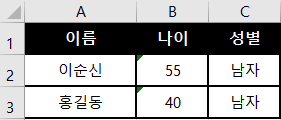